# Exploratory Analysis

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('data/metadata.csv')
df

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,PAT_1708,3156,NaN,NaN,NaN,NaN,73,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1708_3156_175.png,False
2294,PAT_46,880,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,12.0,BCC,True,True,False,True,False,False,PAT_46_880_140.png,True
2295,PAT_1343,1217,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,...,NaN,SEK,False,False,False,False,False,False,PAT_1343_1217_404.png,False
2296,PAT_326,690,False,False,POMERANIA,POMERANIA,58,True,FEMALE,True,...,4.0,BCC,True,False,False,False,False,True,PAT_326_690_823.png,True


In [6]:
print('Data Columns:\n{0}'.format('\n'.join(df.columns.to_list())))

Data Columns:
patient_id
lesion_id
smoke
drink
background_father
background_mother
age
pesticide
gender
skin_cancer_history
cancer_history
has_piped_water
has_sewage_system
fitspatrick
region
diameter_1
diameter_2
diagnostic
itch
grew
hurt
changed
bleed
elevation
img_id
biopsed


In [10]:
print('Number of unique patients:\n{0}'.format(df['patient_id'].unique().size))

Number of unique patients:
1373


/tmp/ipykernel_79117/2604966275.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


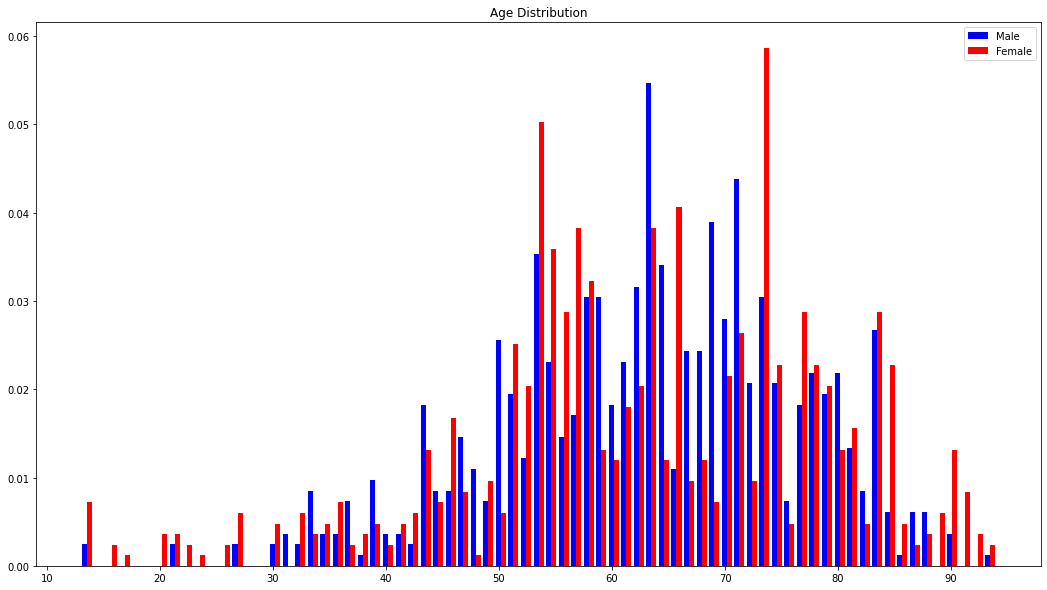

In [31]:
def plot_age_distribution(df: pd.DataFrame):
    male_age = df[df['gender']=='MALE']['age']
    female_age = df[df['gender']=='FEMALE']['age']

    colors=['blue', 'red']
    labels=['Male', 'Female']

    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(1,1,1)
    ax.hist(x=[male_age, female_age], bins=max(male_age.unique().size, female_age.unique().size), color=colors, label=labels, density=True)
    ax.legend()
    ax.set_title('Age Distribution')
    fig.show()

plot_age_distribution(df)

Distribution looks fairly normal, still should group by diagnosis to see if any diagnosis has an age bias.

In [55]:

print("Population background breakdown by region (Top 5):")
f = df['background_father'].value_counts()
m = df['background_mother'].value_counts()
print("\nFathers: ")
for k in f.index[:5]:
    print('{0}: {1} ({2:.2f}%)'.format(k, f[k], 100*f[k]/f.sum()))
print("\nMothers: ")
for k in m.index[:5]:
    print('{0}: {1} ({2:.2f}%)'.format(k, m[k], 100*m[k]/m.sum()))

Population background breakdown by region (Top 5):

Fathers: 
POMERANIA: 530 (35.81%)
GERMANY: 466 (31.49%)
ITALY: 250 (16.89%)
UNK: 95 (6.42%)
BRAZIL: 89 (6.01%)

Mothers: 
POMERANIA: 533 (36.11%)
GERMANY: 482 (32.66%)
ITALY: 236 (15.99%)
UNK: 84 (5.69%)
BRAZIL: 81 (5.49%)
